# Predicting TelCo Customer Churn

This project explores 7043 customers using 21 different features to find ways to predict and reduce churn.

## 1. Load and preview data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


It should be noted that analyzing the above, the SeniorCitizen feature is considered int64, when in reality the datapoints are all 1 or 0 to indicate true or false, may be worth changing the data type during our EDA phase.

We also have TotalCharges which is just considered an object when in reality it should be considered a float64, may be worth looking into why that is

## Data Validation

### Encoding senior citizen data as a boolean

In [3]:
data["SeniorCitizen"] = data["SeniorCitizen"].astype('bool')
data.SeniorCitizen.head

<bound method NDFrame.head of 0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: SeniorCitizen, Length: 7043, dtype: bool>

In [4]:
data.SeniorCitizen.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: SeniorCitizen
Non-Null Count  Dtype
--------------  -----
7043 non-null   bool 
dtypes: bool(1)
memory usage: 7.0 KB


All seems to have worked in our first conversion

In [5]:
len(data.customerID.unique())

7043

No duplicate customers

### Encoding Total Charges as a float

In [6]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")  # Coerces so we can handle the rest of the null data seperately

In [7]:
data[data["TotalCharges"].isnull()] # Figure out which rows have a null value in their total charges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,False,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,False,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,False,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


What we find is that all of the rows that contain a null value for their Total Charges, also have 0 tenure, likely meaning that they've simply racked up no charges and that's where the error is coming from, so we should be safe to fillNA with 0.0

In [8]:
data["TotalCharges"] = data["TotalCharges"].fillna(0.0)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   bool   
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Properly casting all the other types

In [10]:
data[["tenure"]] = data[["tenure"]].astype(int)

In [11]:
numeric_features = ["tenure", "MonthlyCharges", "TotalCharges"]
non_categorical_features = numeric_features + ["SeniorCitizen"]
categorical_features = data.drop(non_categorical_features, axis= 1).columns
data[categorical_features] = data[categorical_features].astype("string")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   gender            7043 non-null   string 
 2   SeniorCitizen     7043 non-null   bool   
 3   Partner           7043 non-null   string 
 4   Dependents        7043 non-null   string 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   string 
 7   MultipleLines     7043 non-null   string 
 8   InternetService   7043 non-null   string 
 9   OnlineSecurity    7043 non-null   string 
 10  OnlineBackup      7043 non-null   string 
 11  DeviceProtection  7043 non-null   string 
 12  TechSupport       7043 non-null   string 
 13  StreamingTV       7043 non-null   string 
 14  StreamingMovies   7043 non-null   string 
 15  Contract          7043 non-null   string 
 16  PaperlessBilling  7043 non-null   string 


### Checking for associations between features

I want to ensure that total charges isn't just tenure * monthly charges as I assume it might be

In [13]:
print(np.mean((np.abs(data.tenure * data.MonthlyCharges - data.TotalCharges))/data.TotalCharges) * 100)

3.2147930013405186


There is an average relative error of 3.2%, thus though tenure * monthly charges is near to total charges, it seems to not be the same datapoint which is quite interesting. For now we will therefore leave all features in

## Data Exploration

### Exploring Cardinality

First step is to analyze the cardinality of the different features to determine if we may need to create grouping to help with interprability and other possible things we may find

In [14]:
data.apply(pd.Series.nunique)

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

What we find is relatively expected, customerID has the same cardinality as the size of our dataset, because customerID is a unique identifier, one **we should drop** as it could lead to overfitting

We find that all other non-numeric features are low enough in cardinality that additional groupings are unlikely to be necessary

## Univariate Distribution Analysis

In [15]:
### Displaying numeric distributions

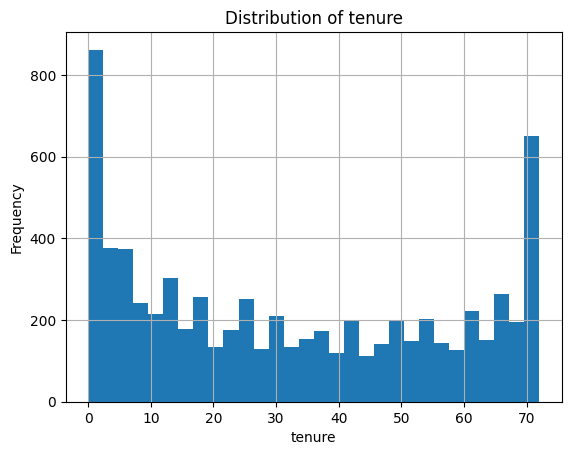

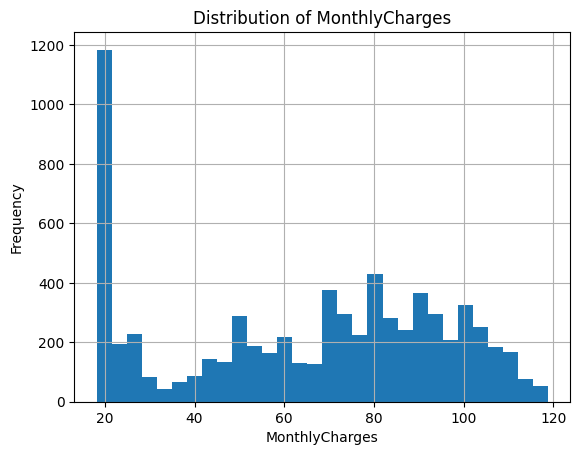

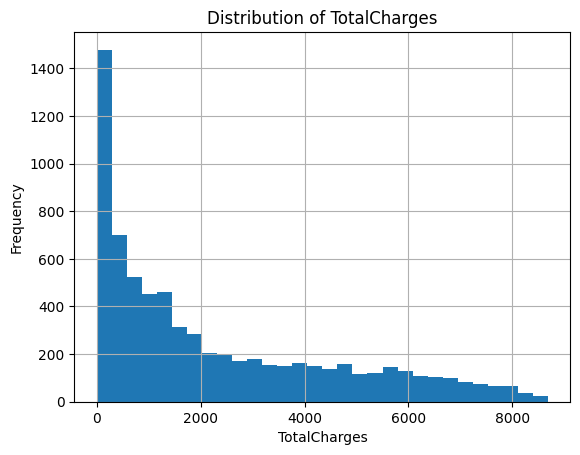

In [16]:
for col in numeric_features:
    plt.figure()
    data[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


Nothing stands out as particularly problematic, beyond it being worth noting that the distributions are all relatively simple beyond strangely high percentage of 0 monthly charges

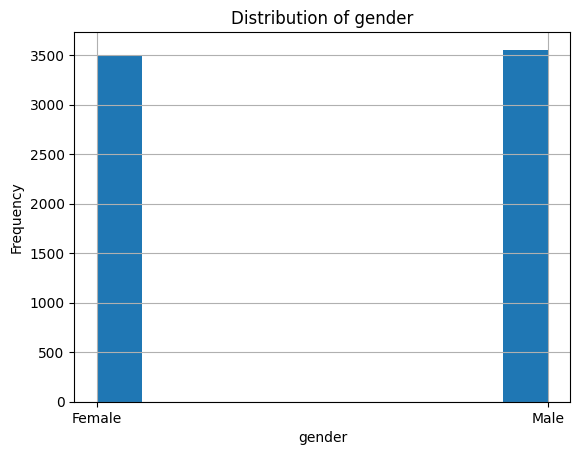

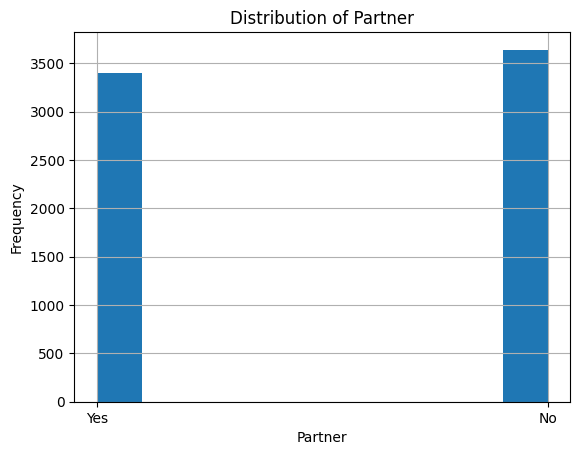

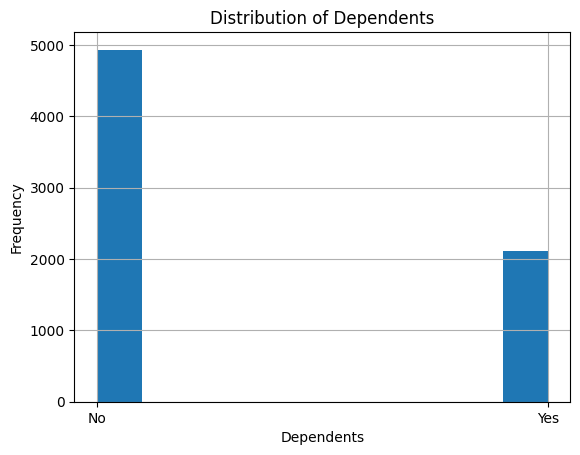

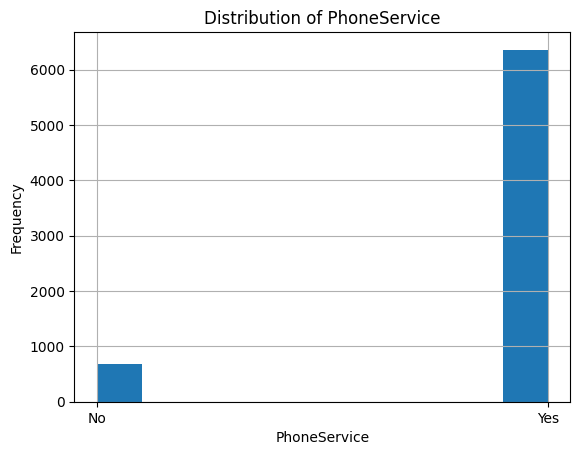

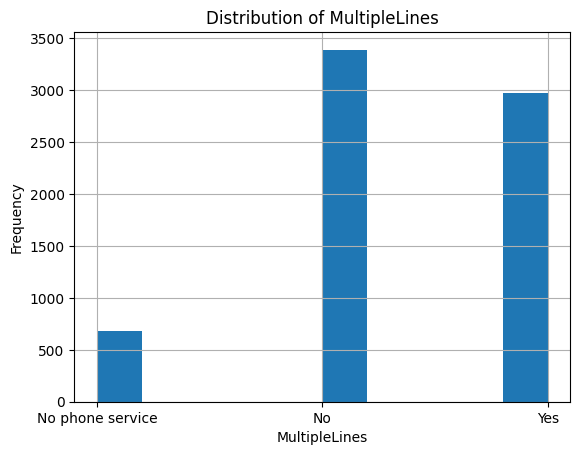

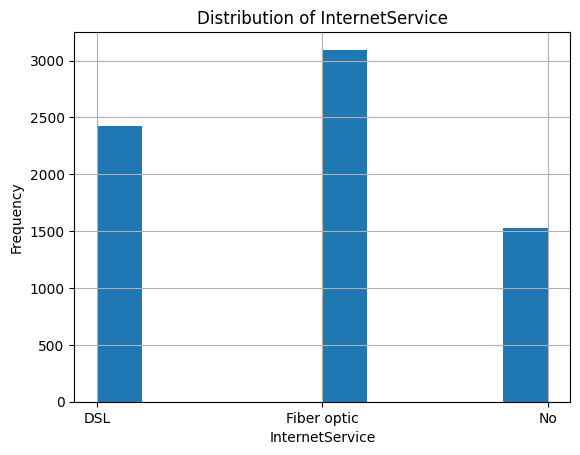

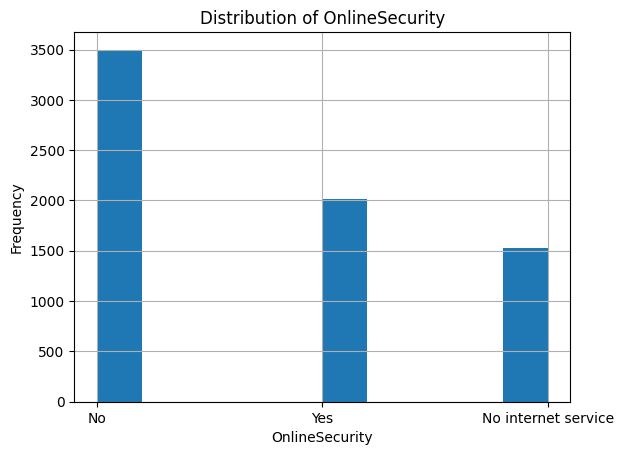

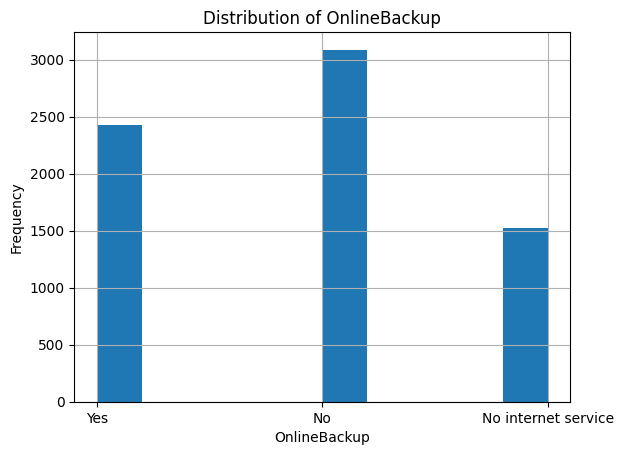

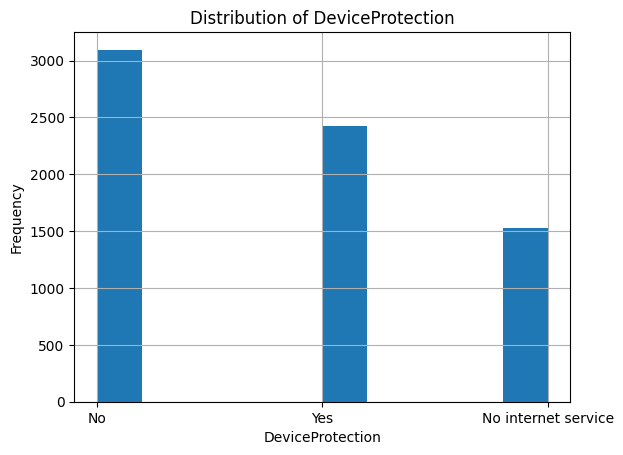

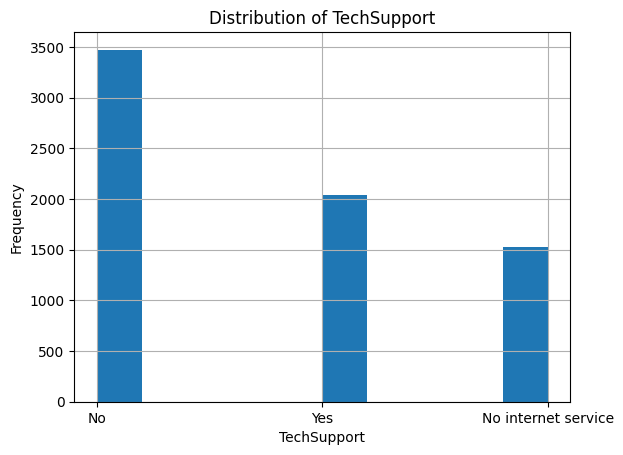

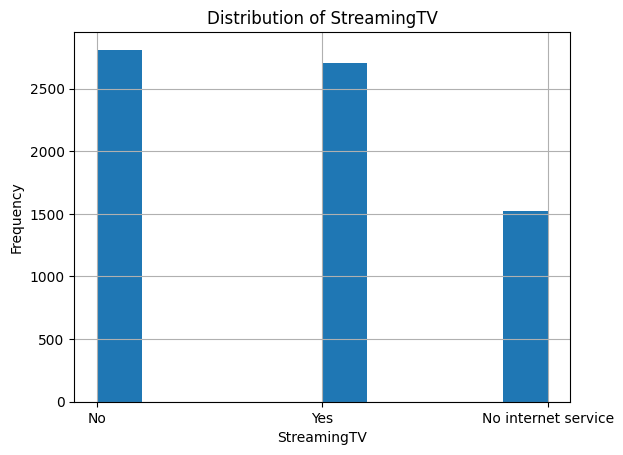

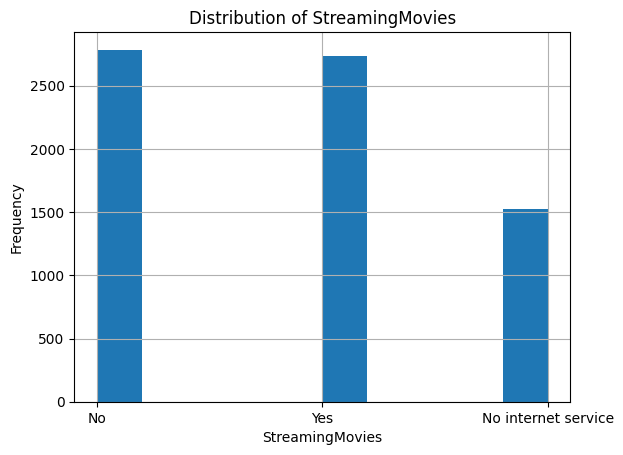

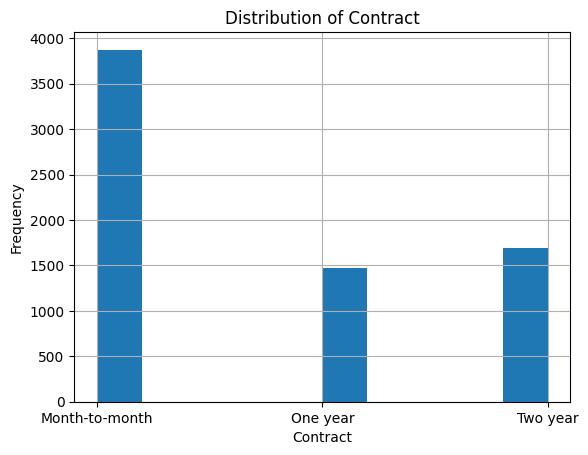

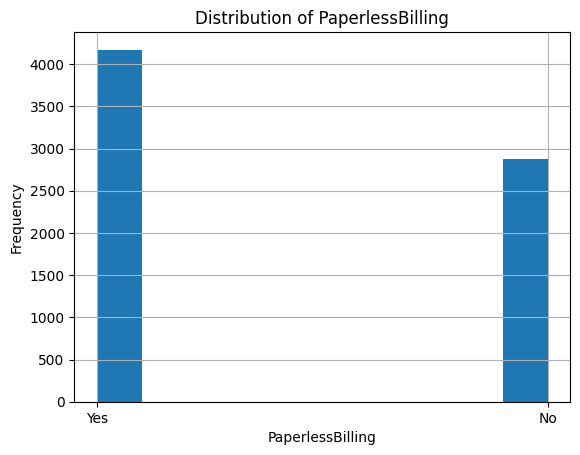

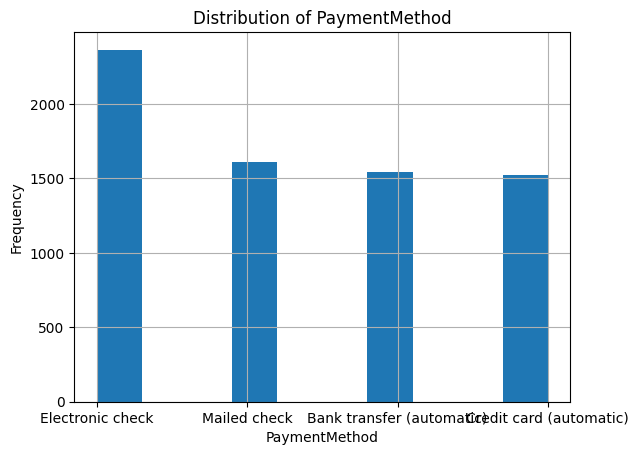

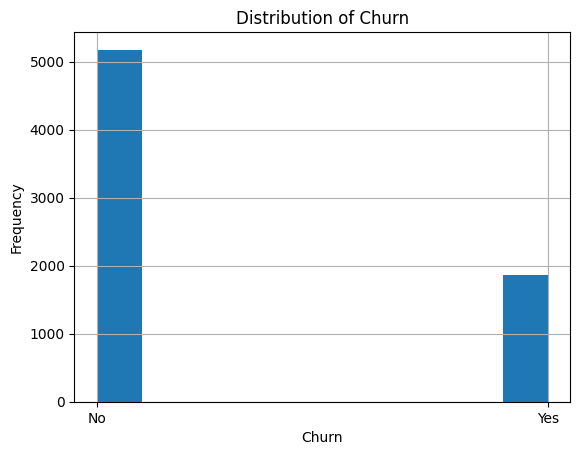

In [17]:
for col in categorical_features[1:]:
    plt.figure()
    data[col].hist()
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Nothing stands out in the categorical distributions

## Outlier Analysis

tenure


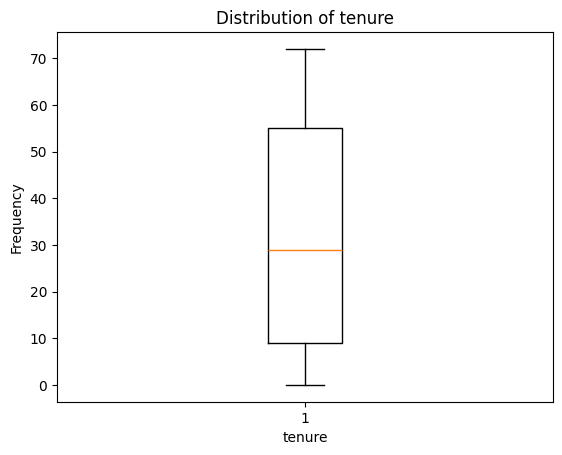

MonthlyCharges


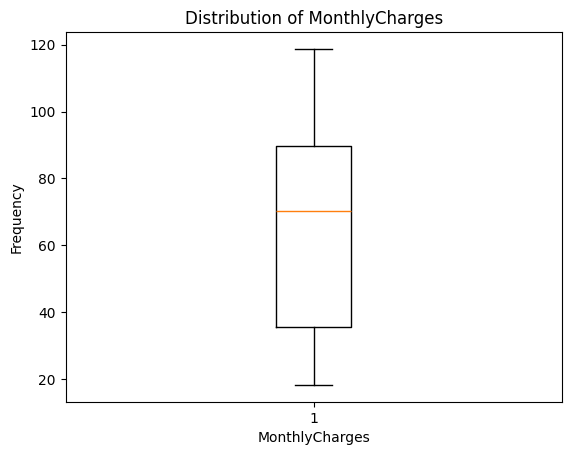

TotalCharges


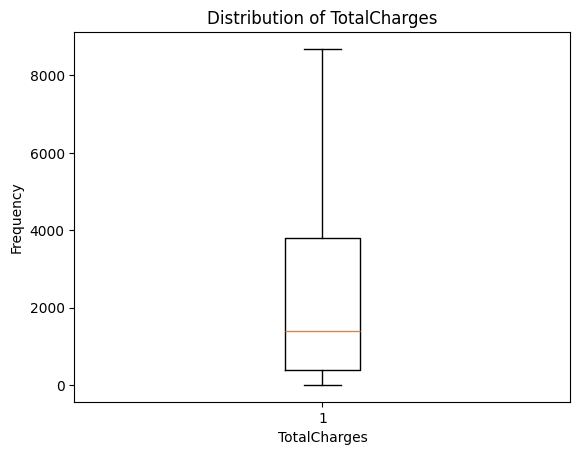

In [ ]:
for col in numeric_features:
    plt.figure()
    plt.boxplot(data[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

We find no obvious outliers through our boxplots